<a href="https://colab.research.google.com/github/edmenciab733/ecc_qiskit_fallfest/blob/main/ecc_qiskit_fallfest_ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

# Emulación de un circuito cuantico del Sumador Completo

<img src="https://codenandor.com/wp-content/uploads/2021/09/11-1.png"> <br/>
<center>Circuito clásico <a target="_blank" href="https://codenandor.com/2021/09/sumadorcompleto/"> Sumador Completo, Prueba de Escritorio con A=1, B=1, C_n=0 <a></center>


In [ ]:
from  qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from qiskit.visualization import plot_histogram
%matplotlib inline

In [81]:
def execute(circuit):
  simulador = Aer.get_backend('aer_simulator')
  job = simulador.run(circuit, shots=1000)
  result = job.result()
  count = result.get_counts()
  return plot_histogram(count, title="Resultado {}".format(list(count.keys())[0]))

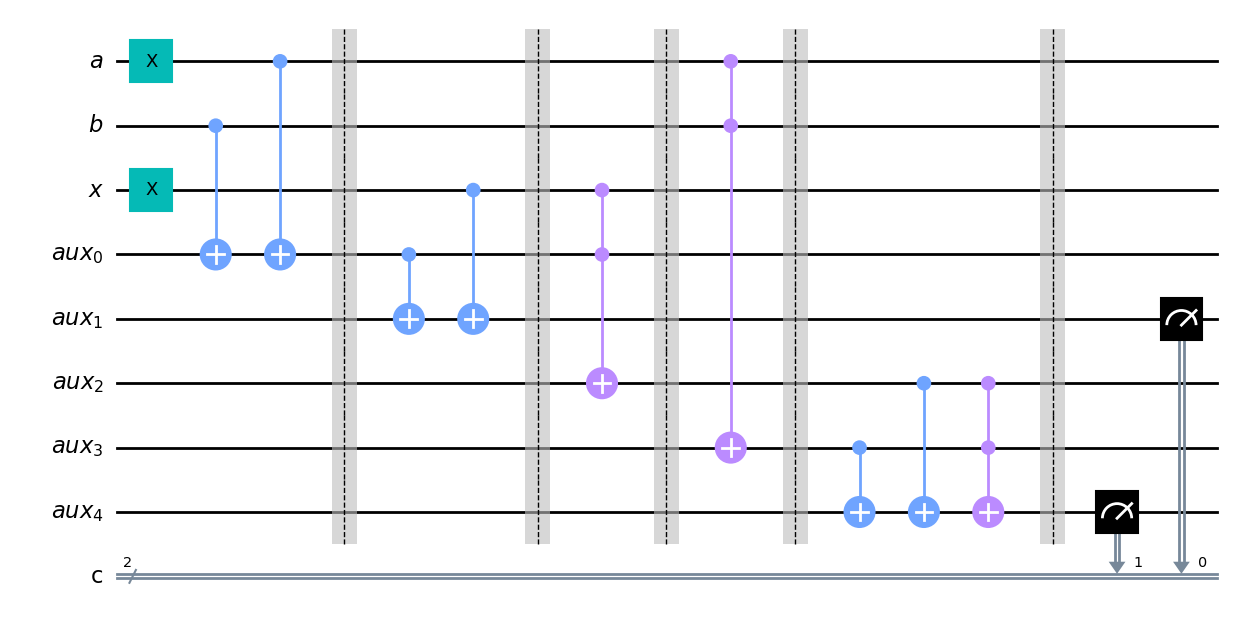

In [83]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# Preparación de los circuitos
qubit_a = QuantumRegister(1, 'a')
qubit_b = QuantumRegister(1, 'b')
qubit_x = QuantumRegister(1, 'x')
aux_qubits = QuantumRegister(5, 'aux')

creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qubit_a, qubit_b, qubit_x, aux_qubits, creg_c)

# Define la entrada
circuit.x(qubit_a[0]) # Entrada A
#circuit.x(qubit_b[0])
circuit.x(qubit_x[0]) #Entrada X

# Circuito cuántico

circuit.cx(qubit_b[0], aux_qubits[0])
circuit.cx(qubit_a[0], aux_qubits[0])
circuit.barrier()
circuit.cx(aux_qubits[0], aux_qubits[1])
circuit.cx(qubit_x[0], aux_qubits[1])
circuit.barrier()
circuit.ccx(qubit_x[0], aux_qubits[0], aux_qubits[2])
circuit.barrier()
circuit.ccx(qubit_a[0], qubit_b[0], aux_qubits[3])
circuit.barrier()
circuit.cx(aux_qubits[3], aux_qubits[4])
circuit.cx(aux_qubits[2], aux_qubits[4])
circuit.ccx(aux_qubits[2], aux_qubits[3], aux_qubits[4])
circuit.barrier()

# Midición de los Carrier(C) y la Suma(S)

circuit.measure(aux_qubits[4], creg_c[1])
circuit.measure(aux_qubits[1], creg_c[0])

#Dibujar el circuito
circuit.draw("mpl")

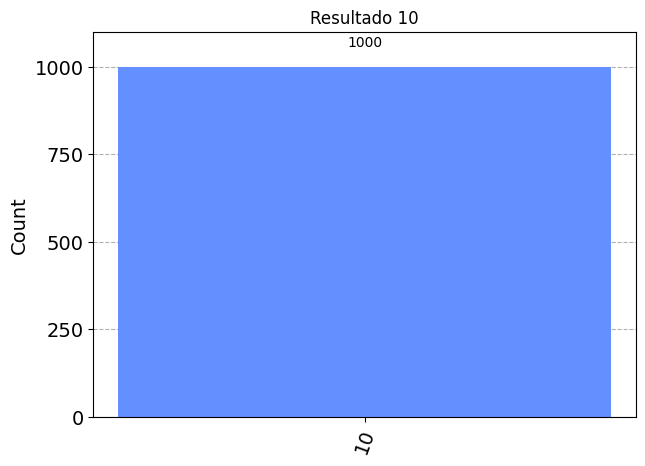

In [84]:
execute(circuit)